#**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd

#**Loading the Churn Dataset**

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

**Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.**

In [2]:
churn_data = pd.read_csv('/content/drive/MyDrive/AMITY/Deep Learning (codes)/Data/Churn_Modelling.csv', delimiter = ',')
churn_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#**Accessing the Column Names in the Dataset**

In [3]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#**Setting Column as a Index**

In [4]:
churn_data = churn_data.set_index('RowNumber')
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#**Finding the Shape of the Dataset**

In [5]:
churn_data.shape

(10000, 13)

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


#**Checking Missing Values**

In [7]:
churn_data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **Some Columns are Totally Unproductive so let's Remove them**

In [ ]:
churn_data.nunique()

In [ ]:
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_data.shape

(10000, 11)

#**Some Visualizations**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
df = churn_data.copy()

In [ ]:
def plot_univariate(col):
    if(df[col].nunique()>2):
        plt.figure(figsize=(10,7))
        h = 0.15
        rot=90
    else:
        plt.figure(figsize=(6,6))
        h = 0.5
        rot=0
    plot = sns.countplot(x = df[col], palette='pastel')
    
    for bars in plot.containers:
        for p in bars:
            plot.annotate(format(p.get_height()), (p.get_x() + p.get_width()*0.5, p.get_height()), 
                    ha = 'center', va = 'bottom')
            plot.annotate(f'{p.get_height()*100/df[col].shape[0] : .1f}%', (p.get_x() + p.get_width()*0.5, h*p.get_height()), 
                    ha = 'center', va = 'bottom', rotation=rot) 

In [ ]:
def plot_bivariate(col,hue):    
    if(df[col].nunique()>5):
        plt.figure(figsize=(20,10))   
        rot=90
    else:
        plt.figure(figsize=(10,7))
        rot=0
    def percentage(ax):
        heights = [[p.get_height() for p in bars] for bars in ax.containers] #Get the counts of each bar, make arrays when more than one in group
        for bars in ax.containers:
            for i, p in enumerate(bars):
                total = sum(group[i] for group in heights) #Sum total of each group
                percentage = (100 * p.get_height() / total) #Calculate % to annotate
                ax.annotate(format(p.get_height()), (p.get_x() + p.get_width()*0.5,0.8*p.get_height()), 
                    ha = 'center', va = 'bottom', rotation=0)
                if(percentage>25.0):
                    percentage = f'{percentage:.1f}%'
                    ax.annotate( percentage, (p.get_x() + p.get_width()*0.5, 0.25*p.get_height()), ha='center', va='center', rotation=rot)


    plot = sns.countplot(x=df[col], hue=df[hue],palette='pastel')
    percentage(plot) 

In [ ]:
def spearman(df,hue):
    feature = []
    correlation = []
    result = []
    for col in df.columns:
        corr, p = stats.spearmanr(df[col], df[hue])
        feature.append(col)
        correlation.append(corr)
        alpha = 0.05
        if p > alpha:
            result.append('No correlation (fail to reject H0)')
        else:
            result.append('Some correlation (reject H0)')
    c = pd.DataFrame({'Feature Name':feature,'correlation coefficient':correlation, 'Inference':result})
    display(c)

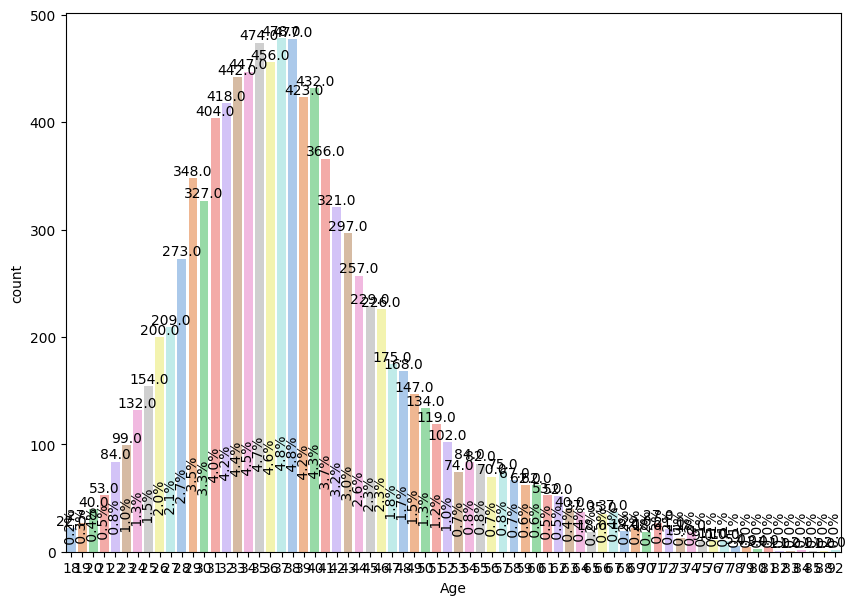

In [ ]:
plot_univariate('Age')

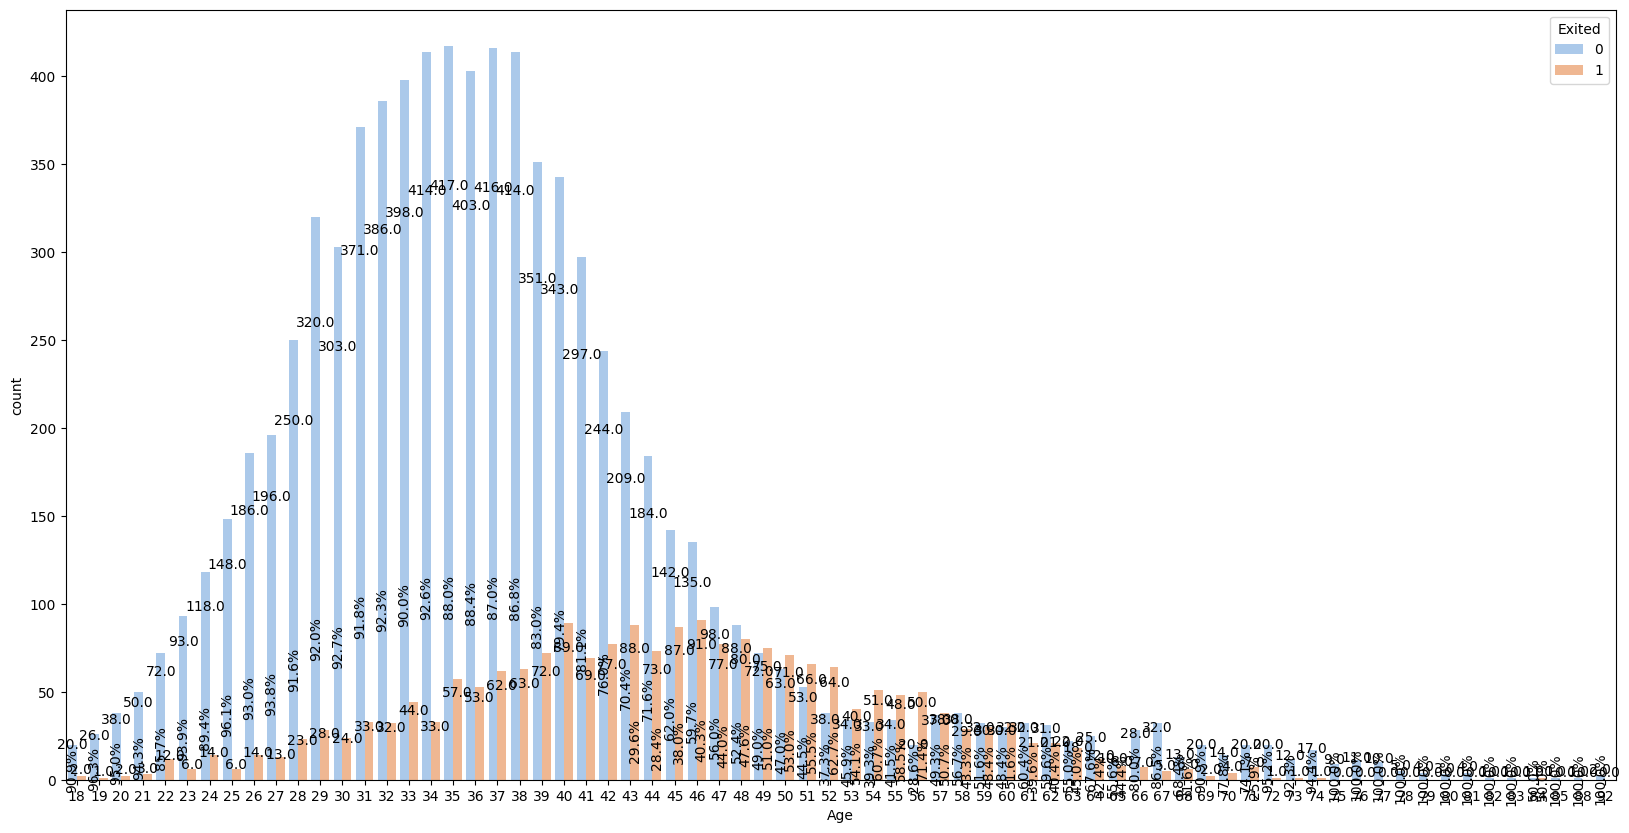

In [ ]:
plot_bivariate('Age','Exited')

In [ ]:
spearman(churn_data,'Age')

,Feature Name,correlation coefficient,Inference
0,CreditScore,-0.007974,No correlation (fail to reject H0)
1,Geography,0.035351,Some correlation (reject H0)
2,Gender,-0.029785,Some correlation (reject H0)
3,Age,1.000000,Some correlation (reject H0)
4,Tenure,-0.010405,No correlation (fail to reject H0)
5,Balance,0.033304,Some correlation (reject H0)
6,NumOfProducts,-0.058566,Some correlation (reject H0)
7,HasCrCard,-0.015278,No correlation (fail to reject H0)
8,IsActiveMember,0.039839,Some correlation (reject H0)
9,EstimatedSalary,-0.002431,No correlation (fail to reject H0)


# **Label Encoding of Categorical Variables**

Label Encoding means converting categorical features into numerical values. So that they can be fitted by machine learning models which only take numerical data.

**Example:** Suppose we have a column Height in some dataset that has elements as Tall, Medium, and short. To convert this categorical column into a numerical column we will apply label encoding to this column. After applying label encoding, the Height column is converted into a numerical column having elements 0,1, and 2 where 0 is the label for tall, 1 is the label for medium, and 2 is the label for short height.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn_data[['Geography', 'Gender']] = churn_data[['Geography', 'Gender']].apply(le.fit_transform)

In [ ]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


#**Seperating Label from Data**

In [ ]:
y = churn_data.Exited
X = churn_data.drop(['Exited'],axis=1)

In [ ]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
y

RowNumber
1        1
2        0
3        1
4        0
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    0
Name: Exited, Length: 10000, dtype: int64

#**Splitting the Data into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [ ]:
print("Shape of the X_train", X_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the y_test", y_test.shape)

Shape of the X_train (7000, 10)
Shape of the X_test (3000, 10)
Shape of the y_train (7000,)
Shape of the y_test (3000,)


# **Feature Scaling:**
The result of **standardization** (or **Z-Score normalization**) is that the features will be re scaled so that they'll have the properties of a standard normal distribution with: 
$$\mu = 0$$
And
$$\sigma = 1$$

Where $\mu$ is the mean(average) and $\sigma$ is the standard deviation from the mean; standard scores (also called **Z** scores) of the sampels are calculated as follows: 
$$z = \frac{x - \mu}{\sigma}$$

***

# **About Min-Max Scaling**

An alternative approach to **Z-Score** normalization (or called standardization) is the so-called **Min-Max Scaling** (often also simply called **Normalization** - a common cause for ambiguities)

In this approach, the data is scaled to a fixed range - usually `[0, 1]`. 
The cost of having this bounded range - in contrast to standrdization - is that we will end up with smaaller standard deviations, which can suppress the effect of outliers. 

**Note**:

If the dataset have lot's of outliers, and the algorithms are sensitive to outliers, please use `Min-Max Scaler`

A `Min-Max Scaling` is typically done via the foloowing equation: 

$$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$

$X_i$ is the $i^{th}$ sample of dataset. 


# **Z-Score Standardization or Min-Max Scaling**

"Standardization or Min-Max scaling"? - There is no obvious answer to this question: it really depends on the application. 

However this doesn't mean that `Min-Max Scaling` is not useful at all, A popular application is `image processing`, where pixel intensities have to be normalized to fit withint a certain range (i.e., `[0, 255]` for the RGB colour range). Also, typical _Neural Network_ Algorithm require data that on a `0 - 1` scale. 

#**Need for Normalization**
For example, consider a data set containing two features, age(x1), and income(x2). Where age ranges from 0–100, while income ranges from 0–20,000 and higher. Income is about 1,000 times larger than age and ranges from 20,000–500,000. So, these two features are in very different ranges. When we do further analysis, like multivariate linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Building the ANN Model**

In [ ]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# **Compiling and Fitting the Model**

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 1)

Epoch 1/100
700/700 [==============================] - 8s 3ms/step - loss: 0.4790 - accuracy: 0.7923
Epoch 2/100
700/700 [==============================] - 2s 3ms/step - loss: 0.4274 - accuracy: 0.7929
Epoch 3/100
700/700 [==============================] - 2s 3ms/step - loss: 0.4218 - accuracy: 0.8183
Epoch 4/100
700/700 [==============================] - 3s 4ms/step - loss: 0.4187 - accuracy: 0.8239
Epoch 5/100
700/700 [==============================] - 2s 3ms/step - loss: 0.4165 - accuracy: 0.8281
Epoch 6/100
700/700 [==============================] - 2s 3ms/step - loss: 0.4143 - accuracy: 0.8311
Epoch 7/100
700/700 [==============================] - 2s 3ms/step - loss: 0.4130 - accuracy: 0.8311
Epoch 8/100
700/700 [==============================] - 2s 3ms/step - loss: 0.4104 - accuracy: 0.8343
Epoch 9/100
700/700 [==============================] - 2s 3ms/step - loss: 0.4091 - accuracy: 0.8336
Epoch 10/100
700/700 [==============================] - 3s 4ms/step - loss: 0.4075 - accura

#**Testing the Model**

In [ ]:
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

700/700 [==============================] - 2s 2ms/step - loss: 0.3946 - accuracy: 0.8369
Train score: 0.39457011222839355
Train accuracy: 0.8368571400642395
94/94 [==============================] - 0s 2ms/step
********************
300/300 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8353
Test score: 0.4082989990711212
Test accuracy: 0.8353333473205566


#**Confusion Matrix**

### * **Accuracy** 
number of examples correctly predicted / total number of examples  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
target_names = ['Retained', 'Closed']
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 23.52222222222222, 'Predicted label')

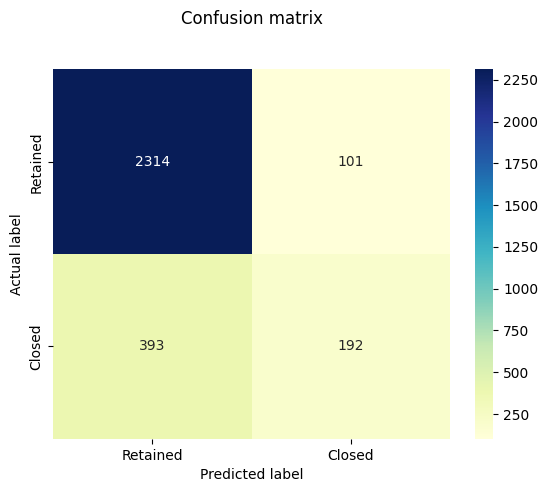

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**Classification Report**

### * **True Positive Rate**
number of samples actually and predicted as  `Positive` / total number of samples actually `Positive`  
Also called **Sensitivity or Recall**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


### * **Positive Predictive Value**
number of samples actually and predicted as  `Positive` / total number of samples predicted as `Positive`  
Also called **Precision**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)

### * **F1 score**
Harmonic Mean of Precision and Recall.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Retained       0.85      0.96      0.90      2415
      Closed       0.66      0.33      0.44       585

    accuracy                           0.84      3000
   macro avg       0.76      0.64      0.67      3000
weighted avg       0.82      0.84      0.81      3000



#**ROC curve**

94/94 [==============================] - 0s 2ms/step


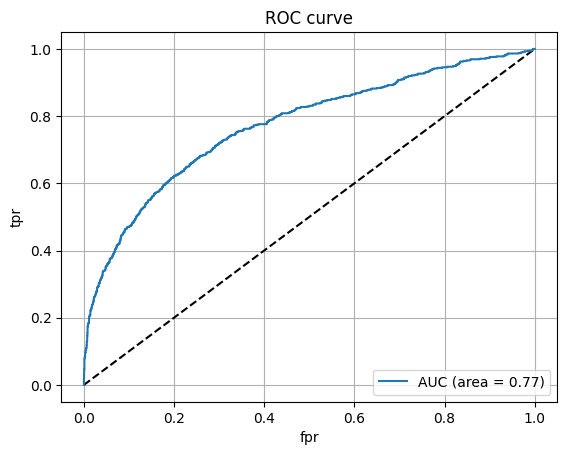

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7721279043018173

# **Finetuing the Network**

In [ ]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [16, 32],
              'epochs': [50, 100],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy', cv = 2) #,cv = 10
grid_search = grid_search.fit(X_train, y_train,verbose = 1)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/50


<ipython-input-83-13f173b85023>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier)


219/219 [==============================] - 1s 2ms/step - loss: 0.5967 - accuracy: 0.7963
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.7966
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.7966
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7966
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.7966
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4181 - accuracy: 0.7966
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4147 - accuracy: 0.7966
Epoch 8/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.7966
Epoch 9/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8217
Epoch 10/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4038 - accuracy: 0.8294
Epoch 11/5

In [ ]:
best_parameters

{'batch_size': 32, 'epochs': 50, 'optimizer': 'rmsprop'}

In [ ]:
best_accuracy

0.8458571428571429